<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [11]:
# Check for GPU
!nvidia-smi

Tue Mar 18 08:23:31 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.06             Driver Version: 535.183.06   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  | 00000000:47:00.0 Off |                    0 |
| N/A   41C    P0              54W / 275W |  39931MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [12]:
# Import torch
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from helper_functions import *
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device="cpu"

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

In [13]:
# Three areas of computer vision includes 
# Automotive(Quality Management), Healthcare(Cancer Detection), Agriculture(Monitoring)

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [14]:
# Overfitting is a problem in machine learning where the model 
# fits too well on the training data and does badly on the testing data

# when the machine learning model gives accurate predictions for training data but not for new data - Amazon

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [15]:
# https://aws.amazon.com/what-is/overfitting/
# K-fold cross-validation for detection
# Keep one subset as the validation data and train the machine learning model on the remaining K-1 subsets
# For prevention:
# Early stopping
# Data Augmentation - change the sample data
# Regularization - eliminate factors that doesnt impact outcome

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [16]:
# YES

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [17]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True, 
    download=True, 
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, 
    download=True,
    transform=ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

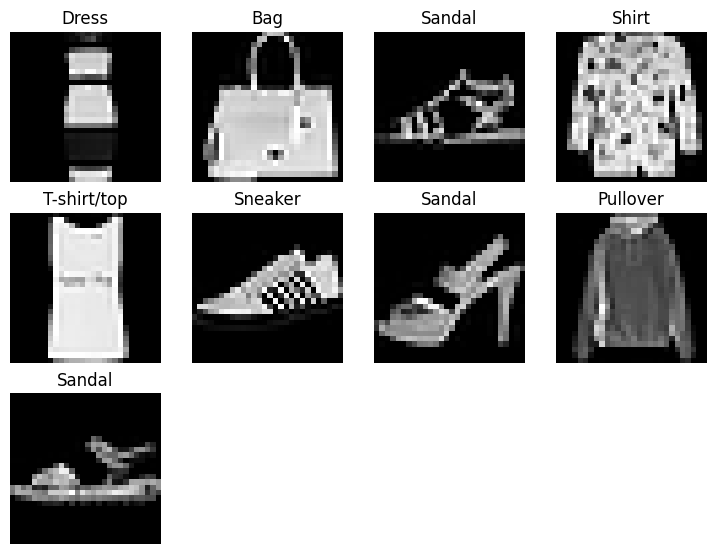

In [18]:
fig = plt.figure(figsize=(9, 9))
for i in range(1, 10):
    randomId=torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[randomId]
    fig.add_subplot(4, 4, i)
    # set colormap to grey
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)}")
print(f"Length of test dataloader: {len(test_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ff49c184710>, <torch.utils.data.dataloader.DataLoader object at 0x7ff4b4233710>)
Length of train dataloader: 1875
Length of test dataloader: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [20]:
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.block=torch.nn.Sequential(
            torch.nn.Conv2d(1,10,3,1,1),
            torch.nn.Conv2d(10,10,3,1,1),
            torch.nn.ReLU(),
            # 
            torch.nn.Conv2d(10,10,3,1,1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            # 
            torch.nn.Conv2d(10,10,3,1,1),
            torch.nn.ReLU(),
            # 
            torch.nn.Conv2d(10,10,3,1,1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            # 
            torch.nn.Flatten(),
            torch.nn.Linear(10*7*7,10)
            )

    def forward(self, x):
        return self.block(x)
tinyvgg=TinyVGG()
tinyvgg

TinyVGG(
  (block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [21]:
from tqdm.auto import tqdm


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=tinyvgg.parameters(), 
                            lr=0.1)
epochs=5
train_loss_values=[]
test_loss_values=[]
train_acc_values=[]
test_acc_values=[]
epoch_count =[]
for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}")
    tinyvgg.to(device)
    tinyvgg.train()
    train_loss, train_acc = 0, 0
    test_loss, test_acc = 0, 0
    for batch, (X,y) in enumerate(train_dataloader):
        X,y=X.to(device),y.to(device)
        # forward pass
        # 32 batch, 1 channel, 32x32 size
        # print(X.shape)
        logits=tinyvgg(X)
        # error
        # print(f"{logits.shape} : {y.shape}")
        loss=loss_fn(logits,y)
        train_loss+=loss
        # gets the highest from the logits
        
        train_acc+=accuracy_fn(y, logits.argmax(dim=1))
        # zero grad
        optimizer.zero_grad()
        # loss backward
        loss.backward()
        # backprop
        optimizer.step()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    tinyvgg.to(device)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    tinyvgg.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_logits=tinyvgg(X)
            test_loss+=loss_fn(test_logits,y)
            test_acc+=accuracy_fn(y, test_logits.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    train_loss_values.append(train_loss.detach().numpy())
    train_acc_values.append(train_acc)
    test_loss_values.append(test_loss.detach().numpy())
    test_acc_values.append(test_acc)
    epoch_count.append(epoch)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0
Train loss: 0.60204 | Train accuracy: 78.50%


 20%|██        | 1/5 [00:22<01:29, 22.39s/it]

Test loss: 0.36579 | Test accuracy: 86.57%
epoch: 1
Train loss: 0.34231 | Train accuracy: 87.80%


 40%|████      | 2/5 [00:44<01:06, 22.25s/it]

Test loss: 0.33828 | Test accuracy: 87.83%
epoch: 2
Train loss: 0.31164 | Train accuracy: 88.81%


 60%|██████    | 3/5 [01:05<00:43, 21.76s/it]

Test loss: 0.32443 | Test accuracy: 88.32%
epoch: 3
Train loss: 0.29516 | Train accuracy: 89.33%


 80%|████████  | 4/5 [01:26<00:21, 21.50s/it]

Test loss: 0.31553 | Test accuracy: 88.66%
epoch: 4
Train loss: 0.28355 | Train accuracy: 89.68%


100%|██████████| 5/5 [01:48<00:00, 21.78s/it]

Test loss: 0.33563 | Test accuracy: 87.93%


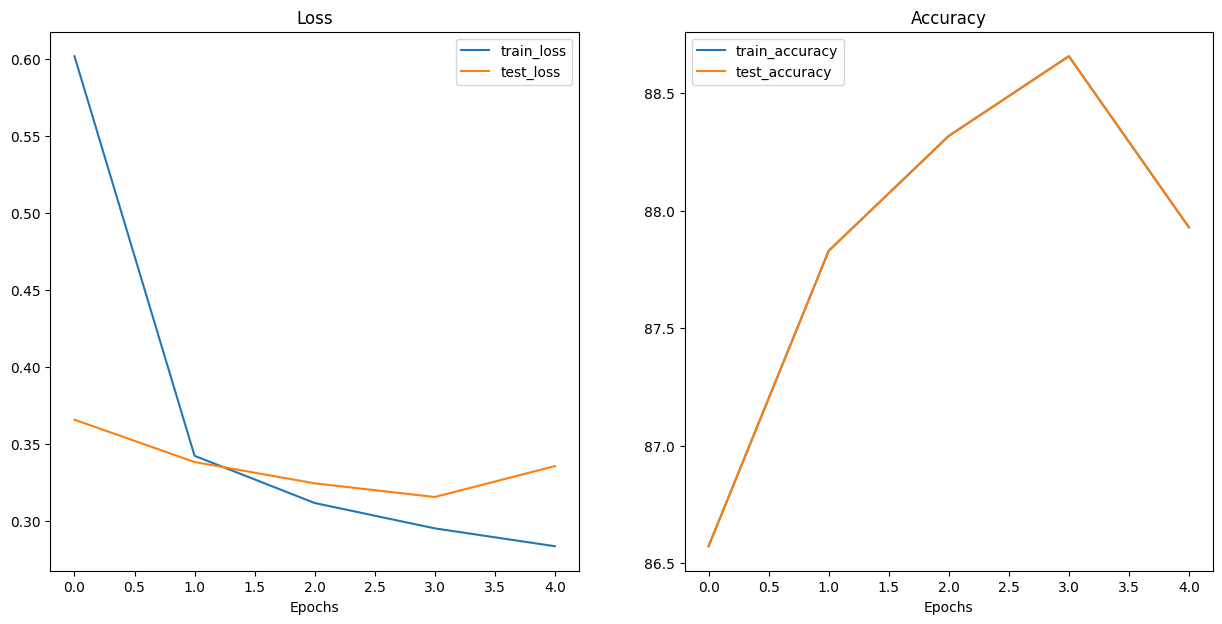

In [22]:
plt.figure(figsize=(15, 7))
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss_values, label="train_loss")
plt.plot(epoch_count, test_loss_values, label="test_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epoch_count, test_acc_values, label="train_accuracy")
plt.plot(epoch_count, test_acc_values, label="test_accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend()

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [23]:
class_names=train_data.classes 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

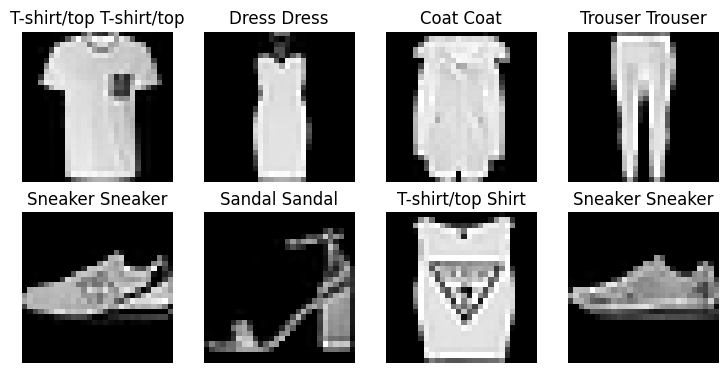

In [24]:


fig = plt.figure(figsize=(9, 9))
for i in range(1, 9):
    randomId=torch.randint(0, len(test_data), size=[1]).item()
    image, label = test_data[randomId]
    sample = torch.unsqueeze(image, dim=0).to(device) 
    with torch.inference_mode():
        pred_logits=tinyvgg(sample)
        pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
    fig.add_subplot(4, 4, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"{class_names[label]} {class_names[torch.argmax(pred_prob)]}")
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 224.62it/s]


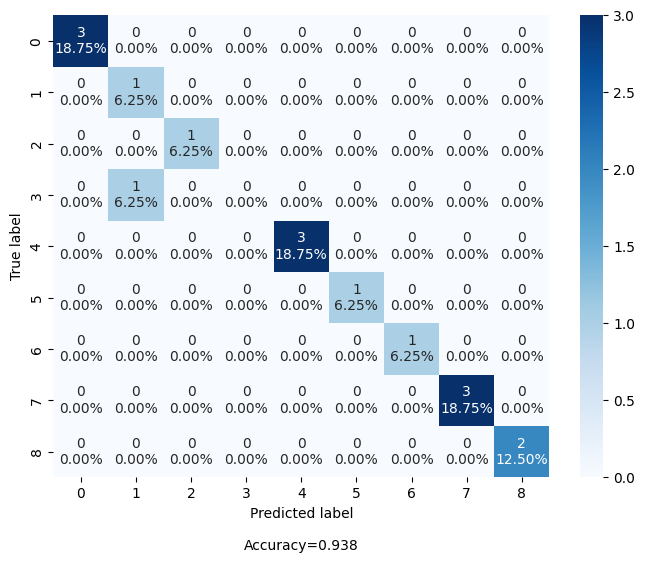

In [25]:
# Import tqdm for progress bar
from sklearn.metrics import confusion_matrix
from tqdm.auto import tqdm

y_preds = []
tinyvgg.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = tinyvgg(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

cf_matrix = confusion_matrix(y, y_pred)
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=True,sum_stats=True)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

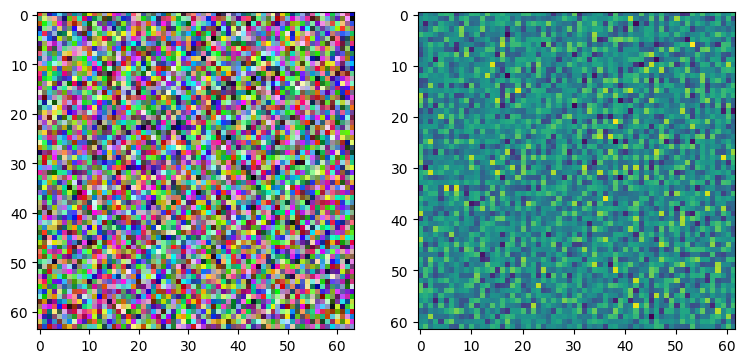

In [26]:
fig = plt.figure(figsize=(9, 9))
A=torch.rand(1,3,64,64)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(A.squeeze().permute(1, 2, 0))
ax2 = fig.add_subplot(1, 2, 2)
conv=torch.nn.Conv2d(3,10,3)
conv_img = conv(A)[0, 0, :, :].detach() 
ax2.imshow(conv_img)

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [27]:
# Maybe laterr